<a href="https://colab.research.google.com/github/malveeka27/sentimental_analysis/blob/main/Quention1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Helper Code to get you started:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import nltk

importing the data,checking the starting 5 entries and information about the cols

In [ ]:
df =pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      16243 non-null  int64  
 1   ProductId               16243 non-null  object 
 2   UserId                  16242 non-null  object 
 3   ProfileName             16242 non-null  object 
 4   HelpfulnessNumerator    16242 non-null  float64
 5   HelpfulnessDenominator  16242 non-null  float64
 6   Score                   16242 non-null  float64
 7   Time                    16242 non-null  float64
 8   Summary                 16242 non-null  object 
 9   Text                    16242 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


checking for null values

In [ ]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    1
ProfileName               1
HelpfulnessNumerator      1
HelpfulnessDenominator    1
Score                     1
Time                      1
Summary                   1
Text                      1
dtype: int64

In [ ]:
df3=df.copy()
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df3.isnull().sum()

Id                        0
ProductId                 0
UserId                    1
ProfileName               1
HelpfulnessNumerator      1
HelpfulnessDenominator    1
Score                     1
Time                      1
Summary                   1
Text                      1
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      16243 non-null  int64  
 1   ProductId               16243 non-null  object 
 2   UserId                  16242 non-null  object 
 3   ProfileName             16242 non-null  object 
 4   HelpfulnessNumerator    16242 non-null  float64
 5   HelpfulnessDenominator  16242 non-null  float64
 6   Score                   16242 non-null  float64
 7   Time                    16242 non-null  float64
 8   Summary                 16242 non-null  object 
 9   Text                    16242 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
df3 = df3.dropna().reset_index(drop=True)

In [ ]:
df3.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      16242 non-null  int64  
 1   ProductId               16242 non-null  object 
 2   UserId                  16242 non-null  object 
 3   ProfileName             16242 non-null  object 
 4   HelpfulnessNumerator    16242 non-null  float64
 5   HelpfulnessDenominator  16242 non-null  float64
 6   Score                   16242 non-null  float64
 7   Time                    16242 non-null  float64
 8   Summary                 16242 non-null  object 
 9   Text                    16242 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


Duplicate data

In [ ]:
duplicate_data = df3[df3.duplicated(subset=['UserId','ProfileName','Time','Text'],keep=False)]
duplicate_data.shape

(1183, 10)

In [ ]:
df3 = df3.drop_duplicates(subset=['UserId','ProfileName','Time','Text'],keep='first',inplace=False)
df3.shape

(15645, 10)

Seeing the score col

<Axes: ylabel='Score'>

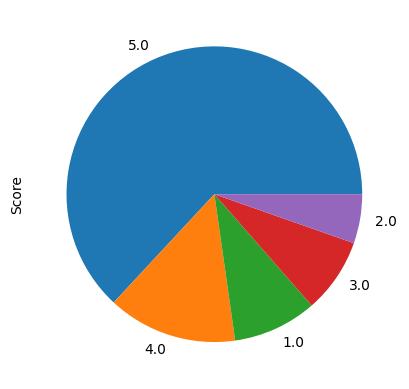

In [ ]:
df3['Score'].value_counts().plot.pie()

In [ ]:
data_new1 = df3.copy()                               # Create copy of DataFrame


In [ ]:
data_new1['Score'] = data_new1['Score'].astype(float)

In [ ]:
df3.loc[df3['Score'] == 'but they are nice for a more \'tender\'palate that likes things not-so-spicy.<br /><br />*NEWSFLASH*  Okay']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15645 entries, 0 to 16241
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      15645 non-null  int64  
 1   ProductId               15645 non-null  object 
 2   UserId                  15645 non-null  object 
 3   ProfileName             15645 non-null  object 
 4   HelpfulnessNumerator    15645 non-null  float64
 5   HelpfulnessDenominator  15645 non-null  float64
 6   Score                   15645 non-null  float64
 7   Time                    15645 non-null  float64
 8   Summary                 15645 non-null  object 
 9   Text                    15645 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15645 entries, 0 to 16241
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      15645 non-null  int64  
 1   ProductId               15645 non-null  object 
 2   UserId                  15645 non-null  object 
 3   ProfileName             15645 non-null  object 
 4   HelpfulnessNumerator    15645 non-null  float64
 5   HelpfulnessDenominator  15645 non-null  float64
 6   Score                   15645 non-null  float64
 7   Time                    15645 non-null  float64
 8   Summary                 15645 non-null  object 
 9   Text                    15645 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15645 entries, 0 to 16241
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      15645 non-null  int64  
 1   ProductId               15645 non-null  object 
 2   UserId                  15645 non-null  object 
 3   ProfileName             15645 non-null  object 
 4   HelpfulnessNumerator    15645 non-null  float64
 5   HelpfulnessDenominator  15645 non-null  float64
 6   Score                   15645 non-null  float64
 7   Time                    15645 non-null  float64
 8   Summary                 15645 non-null  object 
 9   Text                    15645 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
data_new1 = data_new1.reset_index()

the cleaned data without duplicate and null values

In [ ]:
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15645 non-null  int64  
 1   Id                      15645 non-null  int64  
 2   ProductId               15645 non-null  object 
 3   UserId                  15645 non-null  object 
 4   ProfileName             15645 non-null  object 
 5   HelpfulnessNumerator    15645 non-null  float64
 6   HelpfulnessDenominator  15645 non-null  float64
 7   Score                   15645 non-null  float64
 8   Time                    15645 non-null  float64
 9   Summary                 15645 non-null  object 
 10  Text                    15645 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
data_new1.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


<Axes: ylabel='Score'>

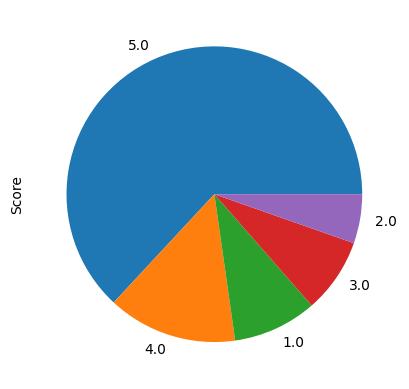

In [ ]:
data_new1['Score'].value_counts().plot.pie()

In [ ]:
print(data_new1.Score.unique)

<bound method Series.unique of 0        5.0
1        1.0
2        4.0
3        2.0
4        5.0
        ... 
15640    5.0
15641    3.0
15642    4.0
15643    5.0
15644    5.0
Name: Score, Length: 15645, dtype: float64>


In [ ]:
df3['Score'] = df3['Score'].astype(int)

In [ ]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15645 entries, 0 to 16241
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      15645 non-null  int64  
 1   ProductId               15645 non-null  object 
 2   UserId                  15645 non-null  object 
 3   ProfileName             15645 non-null  object 
 4   HelpfulnessNumerator    15645 non-null  float64
 5   HelpfulnessDenominator  15645 non-null  float64
 6   Score                   15645 non-null  int64  
 7   Time                    15645 non-null  float64
 8   Summary                 15645 non-null  object 
 9   Text                    15645 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
df3 = df3.reset_index()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15645 non-null  int64  
 1   Id                      15645 non-null  int64  
 2   ProductId               15645 non-null  object 
 3   UserId                  15645 non-null  object 
 4   ProfileName             15645 non-null  object 
 5   HelpfulnessNumerator    15645 non-null  float64
 6   HelpfulnessDenominator  15645 non-null  float64
 7   Score                   15645 non-null  int64  
 8   Time                    15645 non-null  float64
 9   Summary                 15645 non-null  object 
 10  Text                    15645 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


Histogram

(array([1437.,  841., 1281., 2217., 9869.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 [<matplotlib.patches.Polygon at 0x7f91bda2c520>])

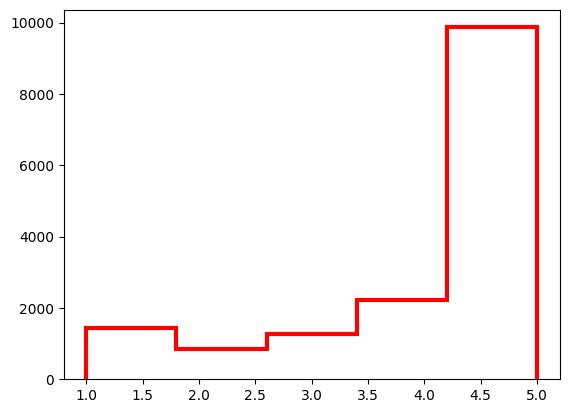

In [ ]:
plt.hist(df3['Score'], bins=5, range=[1, 5], histtype='step',edgecolor='r',linewidth=3)

<Axes: ylabel='Frequency'>

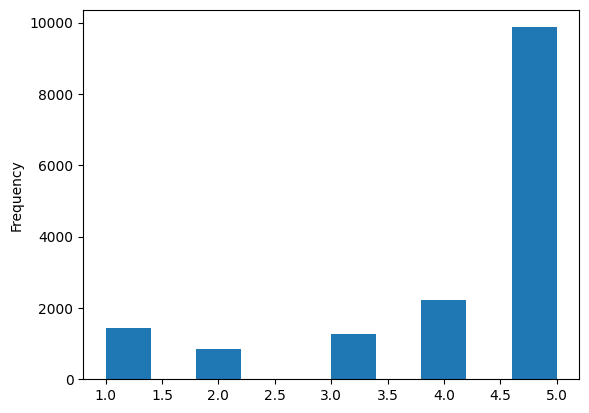

In [ ]:
df3['Score'].plot(kind='hist')

Dropping irrelevant cols

In [ ]:
df3.drop(['Id','ProductId','UserId','ProfileName','Time'],axis=1,inplace=True)

In [ ]:
df3.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


Adding a new col to calculate the review usefulness

In [ ]:
df3["Helpfulness"] = df[["HelpfulnessNumerator","HelpfulnessDenominator"]].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0, axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15645 non-null  int64  
 1   HelpfulnessNumerator    15645 non-null  float64
 2   HelpfulnessDenominator  15645 non-null  float64
 3   Score                   15645 non-null  int64  
 4   Summary                 15645 non-null  object 
 5   Text                    15645 non-null  object 
 6   Helpfulness             15645 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 855.7+ KB


In [ ]:
df3.isnull().sum()

index                     0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   0
Text                      0
Helpfulness               0
dtype: int64

<Axes: ylabel='Frequency'>

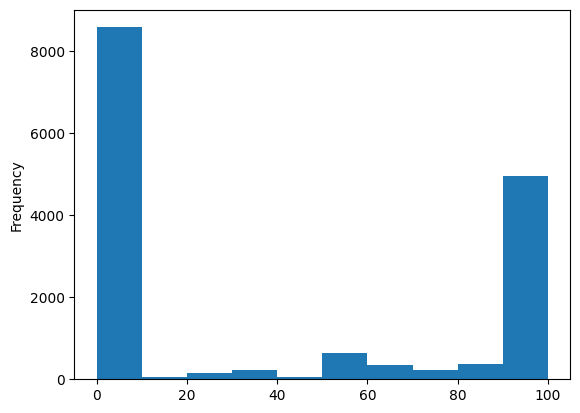

In [ ]:
df3['Helpfulness'].plot(kind='hist')

Introducing a new col to label the helpfulness of the reviews

In [ ]:
df3.loc[df3["Helpfulness"] > 40, 'Helpfulness_indicator'] = 'Useful'
df3.loc[(df3["Helpfulness"] > 0) & (df3["Helpfulness"] <= 40), 'Helpfulness_indicator'] = 'Not Useful'
df3.loc[df3["Helpfulness"] == 0, 'Helpfulness_indicator'] = 'Not Available'



In [ ]:
df3.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Helpfulness,Helpfulness_indicator
0,0,1.0,1.0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,100.0,Useful
1,1,0.0,0.0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,Not Available
2,2,1.0,1.0,4,"""Delight"" says it all",This is a confection that has been around a fe...,100.0,Useful
3,3,3.0,3.0,2,Cough Medicine,If you are looking for the secret ingredient i...,100.0,Useful
4,4,0.0,0.0,5,Great taffy,Great taffy at a great price. There was a wid...,0.0,Not Available


In [ ]:
df3.drop(['HelpfulnessNumerator','HelpfulnessDenominator'],axis=1,inplace=True)

<Axes: ylabel='Helpfulness_indicator'>

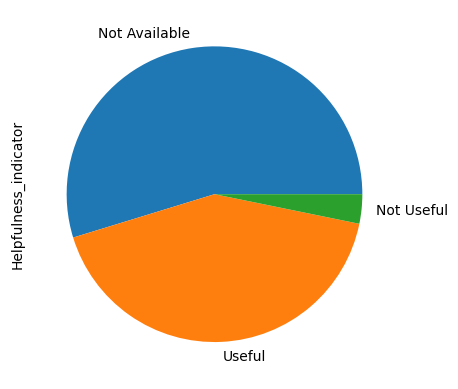

In [ ]:
df3['Helpfulness_indicator'].value_counts().plot.pie()

Adding a new col Sentiments to calculate the sentimate of the review.

In [ ]:
df3.loc[df["Score"] > 3, 'Sentiment'] = 'Positive'
df3.loc[df["Score"] < 3, 'Sentiment'] = 'Negative'
df3.loc[df["Score"] == 3, 'Sentiment'] = 'Neutral'

<Axes: ylabel='Sentiment'>

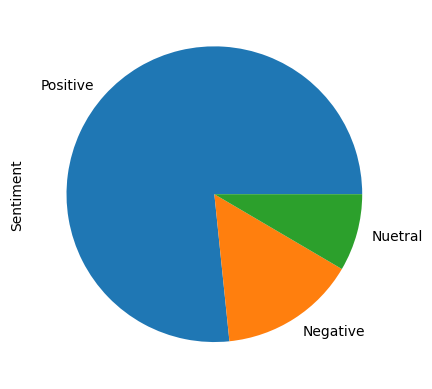

In [ ]:
df3['Sentiment'].value_counts().plot.pie()

Data preprocessing

In [ ]:
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords



import os
from bs4 import BeautifulSoup


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def changeprase(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [ ]:
default_stopwords=set(stopwords.words('english'))


In [ ]:

default_stopwords.add("br")
print(default_stopwords)





{'out', 'being', "hasn't", 'below', 'hadn', 'am', 'both', "weren't", 'wouldn', 'its', 'but', 'shouldn', 'them', 'the', 'he', 'same', 'then', 'down', 'can', 'me', 'doing', 'were', 'or', 'into', 'above', "wouldn't", 'br', 'an', 's', 'wasn', 'while', 'they', 'ain', 'have', "you'll", 'over', 'o', 'herself', 'whom', 'doesn', 'with', 'yours', 'your', 'there', 'if', 'will', 'won', "you've", 'after', 'in', 'who', 'does', 'again', 'further', 'very', 'did', 'of', 'my', "shouldn't", 'didn', "she's", 'yourself', 'having', "couldn't", 'she', 'be', 'nor', 've', 'once', "needn't", 'those', 'll', 'been', 'few', "it's", 'other', 'against', "doesn't", 'so', "that'll", "won't", 'from', 'ma', 'itself', "don't", 'only', 'how', 'her', 'some', 'not', 'what', 'you', 'at', "shan't", 'weren', 'such', 'aren', 'himself', 'and', 'ours', "mightn't", "wasn't", "isn't", 'y', 'our', 'this', 'to', 'has', 'hers', 'here', 't', "mustn't", 'shan', "hadn't", 'are', 'we', 'myself', 'hasn', 'all', 'before', "you're", 'themsel

In [ ]:
from tqdm import tqdm
preprocessed_text =[]
for review in tqdm(df3['Text']):
    review =re.sub(r"http\S+", "",review)
    review =BeautifulSoup(review, 'lxml').get_text()
    review = BeautifulSoup(review, "html.parser").get_text()
    review = changeprase(review)
    review = re.sub("\S\d\S*", "",review).strip()
    review = re.sub('[^A-Za-z]+', ' ',review)
    review = ' '.join(e.lower() for e in review.split() if e.lower() not in default_stopwords   )
    preprocessed_text.append(review.strip())

  0%|          | 0/15645 [00:00<?, ?it/s]<ipython-input-48-10ff9eb8f44d>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review =BeautifulSoup(review, 'lxml').get_text()
<ipython-input-48-10ff9eb8f44d>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review, "html.parser").get_text()
100%|██████████| 15645/15645 [00:07<00:00, 2208.28it/s]


Comparing the original text with processed text

In [ ]:
df3.Text[45]

"Good oatmeal.  I like the apple cinnamon the best.  Though I wouldn't follow the directions on the package since it always comes out too soupy for my taste.  That could just be me since I like my oatmeal really thick to add some milk on top of."

In [ ]:
preprocessed_text[45]

'good oatmeal like apple cinnamon best though would follow directions package since always comes soupy taste could since like oatmeal really thick add milk top'

In [ ]:
df3['newText']=preprocessed_text


In [ ]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  15645 non-null  int64  
 1   Score                  15645 non-null  int64  
 2   Summary                15645 non-null  object 
 3   Text                   15645 non-null  object 
 4   Helpfulness            15645 non-null  float64
 5   Helpfulness_indicator  15645 non-null  object 
 6   Sentiment              15645 non-null  object 
 7   newText                15645 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 977.9+ KB


,index,Score,Summary,Text,Helpfulness,Helpfulness_indicator,Sentiment,newText
0,0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,100.0,Useful,Positive,bought several vitality canned dog food produc...
1,1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,Not Available,Negative,product arrived labeled jumbo salted peanuts p...
2,2,4,"""Delight"" says it all",This is a confection that has been around a fe...,100.0,Useful,Positive,confection around centuries light pillowy citr...
3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,100.0,Useful,Negative,looking secret ingredient robitussin believe f...
4,4,5,Great taffy,Great taffy at a great price. There was a wid...,0.0,Not Available,Positive,great taffy great price wide assortment yummy ...


Word cloud of unprocessed text

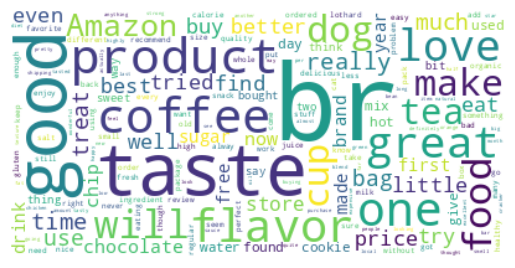

In [ ]:
from wordcloud import WordCloud
text = " ".join(review for review in df3['Text'])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Making the word cloud for positive reviews

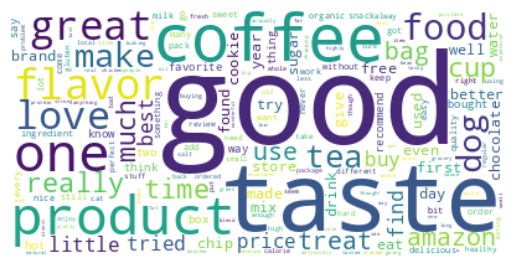

In [ ]:
from wordcloud import WordCloud
df3positive = df3[df3["Sentiment"] == "Positive"]
text = " ".join(review for review in df3positive['newText'])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Making the word cloud for negative reviews

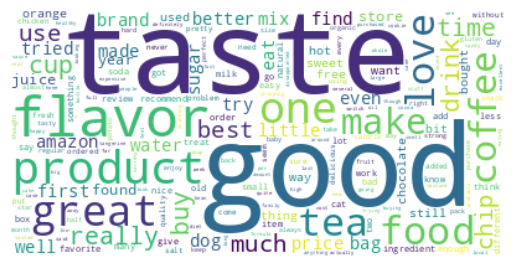

In [ ]:

df3negitive = df3[df3["Sentiment"] == "Negative"]
text = " ".join(review for review in df3negitive['newText'])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud for nuetral sentiments but it can be dropped

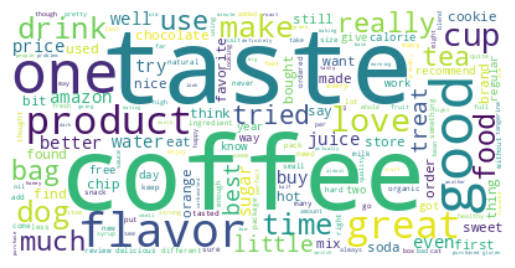

In [ ]:
df3neutral = df3[df3["Sentiment"] == "Neutral"]
text = " ".join(review for review in df3neutral['newText'])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df3.Text[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'